In [2]:
%pylab inline
from pandas import *
import numpy
import matplotlib

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['unique', 'test', 'plotting', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [4]:
# def for creating maze
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M


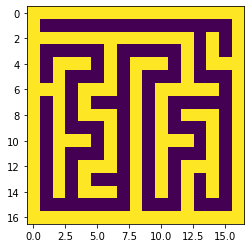

In [6]:
maze=numpy.array(make_maze(8,8)) # i make my maze
# print(maze) 
imshow(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1]
 [1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


29

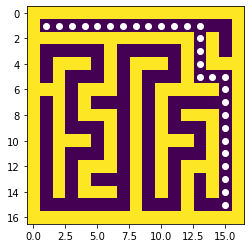

In [7]:
print(maze) 
def getNeighbors(x,y):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for  i in range(4):
        nb.append([x+xm[i],y+ym[i]])
    return nb

#depth-first search algorithm
start_location=[1,1] #our start 
target_location=[15,15] # our target 
distances=numpy.zeros(maze.shape)-1  
front=[start_location] #we add start location to our front
#start location is zero 
distances[start_location[0]][start_location[1]]=0 
# and our step is one 
currentDistance=1
while len (front) > 0: # while our front is not empty 
    newFront=list()
    # loop over all our neighbors
    for currentLoction in front:
        #the neighbors for the current location
        neighbors=getNeighbors(currentLoction[0],currentLoction[1])
        # Print those neighbors 
#         print(neighbors)
        # we loop throw all neighbors of neighbors
        for nb in neighbors:
            #we make sure that we are going on open ways that are 0
            # and we make sure that what we already visited
            # will not be visited again
            if maze[nb[0]][nb[1]]==0 and distances[nb[0]][nb[1]]<0.0:
                #if that is true these steps are our current steps
                distances[nb[0]][nb[1]]=currentDistance
                # we add the valied neighbor to our new front
                newFront.append(nb)
#         print("current front : ",newFront)
    # front will beacom all our new NB
    front=newFront 
    currentDistance+=1 # our steps + 1 to show how log is the target from
    # our start 
path=[target_location]
currentLoction=target_location
while currentLoction!=start_location:
    neighbors=getNeighbors(currentLoction[0],currentLoction[1])
#     print(neighbors)
    nextStep=[]
    for nb in neighbors:
        d=distances[nb[0]][nb[1]]
        if d==distances[currentLoction[0]][currentLoction[1]]-1:
            nextStep=nb
#     print(nextStep)
    currentLoction=nextStep
    path.append(currentLoction)
    
imshow(maze)
plot(transpose(path)[1],transpose(path)[0],"ow")
p = path
len(p)




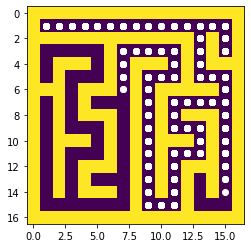

In [10]:
def applyComplexPolicyToMaze(maze,policy,explorationProb=0.0):
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    currentx=1
    currenty=1
    targetx=15
    targety=15
    x=list()
    y=list()
    actiontaken=list()
    while not (currentx == targetx and currenty == targety):
        if numpy.random.random()<explorationProb:
            action=numpy.random.choice([0,1,2,3])
        else:
            action=numpy.random.choice([0,1,2,3],p=policy[currentx][currenty])
        tx=currentx+xm[action]
        ty=currenty+ym[action]
        if maze[tx][ty]==0:
            x.append(currentx)
            y.append(currenty)
            actiontaken.append(action)
            currentx=tx
            currenty=ty

    return x,y,actiontaken

x,y,a=applyComplexPolicyToMaze(maze,policy,explorationProb=0.1)
imshow(maze)
plot(y,x,'ow')

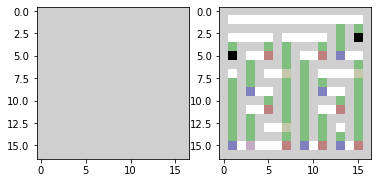

In [11]:
def curatePolicy(maze,policy):
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    for x in range(maze.shape[0]):
        for y in range(maze.shape[1]):
            if maze[x][y]==0:
                for d in range(4):
                    if maze[x+xm[d]][y+ym[d]]==1:
                        policy[x][y][d]=0.0
                policy[x][y]/=policy[x][y].sum()
    return policy
policy=numpy.ones((maze.shape[0],maze.shape[1],4))*0.25
subplot(1,2,1)
imshow(policy)
policy=curatePolicy(maze,policy)
subplot(1,2,2)
imshow(policy)
# imshow(maze)

In [12]:
policy=numpy.ones((maze.shape[0],maze.shape[1],4))*0.25
policy=curatePolicy(maze,policy)
learningRate=0.1

steps=[]
for reps in range(500):
    x,y,a=applyComplexPolicyToMaze(maze,policy,explorationProb=1.0/(reps+1.0))
    for i in range(len(a)):
#       print(x[i],y[i],a[i])
        policy[x[i]][y[i]][a[i]]+=learningRate
        #nomlize to avoide probeblity error 
    for x in range(maze.shape[0]):
        for y in range(maze.shape[1]):
            policy[x][y]/=policy[x][y].sum()
#     print(policy)
#     for action in a:
#         policy[action]+=learningRate
#         policy=policy/policy.sum()
    print(reps,len(a))
    steps.append(len(a))
    


0 1392
1 698
2 400
3 1040
4 420
5 202
6 276
7 216
8 244
9 174
10 186
11 148
12 156
13 80
14 112
15 64
16 82
17 96
18 156
19 94
20 100
21 76
22 62
23 120
24 78
25 100
26 70
27 126
28 122
29 122
30 116
31 92
32 100
33 78
34 58
35 60
36 38
37 84
38 56
39 96
40 64
41 82
42 98
43 88
44 62
45 60
46 114
47 60
48 80
49 112
50 58
51 54
52 80
53 64
54 84
55 144
56 128
57 108
58 112
59 154
60 134
61 104
62 54
63 80
64 68
65 100
66 44
67 94
68 76
69 70
70 96
71 98
72 62
73 60
74 102
75 70
76 60
77 80
78 40
79 56
80 114
81 62
82 60
83 66
84 72
85 52
86 40
87 76
88 72
89 86
90 34
91 52
92 54
93 58
94 42
95 46
96 56
97 46
98 94
99 64
100 36
101 40
102 52
103 48
104 44
105 50
106 42
107 52
108 48
109 34
110 42
111 72
112 58
113 50
114 58
115 68
116 42
117 56
118 42
119 30
120 36
121 32
122 40
123 66
124 56
125 56
126 60
127 72
128 58
129 38
130 32
131 60
132 62
133 64
134 66
135 90
136 116
137 64
138 158
139 274
140 30
141 36
142 48
143 30
144 42
145 66
146 28
147 64
148 34
149 34
150 32
151 48
152 62

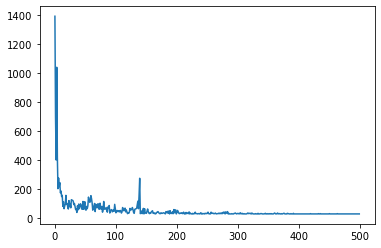

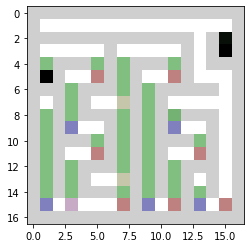

In [13]:
plot(steps)
figure()
imshow(policy)

In [15]:
policy

array([[[2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        ...,
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01]],

       [[2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [2.44055168e-15, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        ...,
        [4.86024125e-01, 0.00000000e+00, 5.13975875e-01, 0.00000000e+00],
        [9.26944482e-01, 7.30555177e-02, 0.00000000e+00, 0.00000000e+00],
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01]],

       [[2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        